In [14]:
pip install -U imbalanced-learn

  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0



In [28]:
conda install graphviz

Solving environment: ...working... done

## Package Plan ##

Note: you may need to restart the kernel to use updated packages.
  environment location: C:\Users\1ayou\anaconda3

  added / updated specs:
    - graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cairo-1.16.0               |       he04af86_2         1.5 MB
    expat-2.4.9                |       h6c2663c_0         207 KB
    fribidi-1.0.10             |       h62dcd97_0          63 KB
    getopt-win32-0.1           |       h2bbff1b_0          19 KB
    glib-2.69.1                |       h5dc1a3c_1         1.6 MB
    graphite2-1.3.14           |       hd77b12b_1          91 KB
    graphviz-2.50.0            |       hdb8b0d4_0         903 KB
    gts-0.7.6                  |       h63ab5a1_3         181 KB
    harfbuzz-4.3.0             |       hb646838_1         855 KB
    libgd-2.3.3                |       ha43c60c_1   



==> WARNING: A newer version of conda exists. <==
  current version: 23.3.1
  latest version: 23.5.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.5.0




  graphite2          pkgs/main/win-64::graphite2-1.3.14-hd77b12b_1 
  graphviz           pkgs/main/win-64::graphviz-2.50.0-hdb8b0d4_0 
  gts                pkgs/main/win-64::gts-0.7.6-h63ab5a1_3 
  harfbuzz           pkgs/main/win-64::harfbuzz-4.3.0-hb646838_1 
  libffi             pkgs/main/win-64::libffi-3.4.4-hd77b12b_0 
  libgd              pkgs/main/win-64::libgd-2.3.3-ha43c60c_1 
  pango              pkgs/main/win-64::pango-1.50.7-h78c2152_0 
  pcre               pkgs/main/win-64::pcre-8.45-hd77b12b_0 
  pixman             pkgs/main/win-64::pixman-0.40.0-h2bbff1b_1 




pango-1.50.7         | 279 KB    |            |   0% 

glib-2.69.1          | 1.6 MB    |            |   0% 


graphite2-1.3.14     | 91 KB     |            |   0% 



graphviz-2.50.0      | 903 KB    |            |   0% 




gts-0.7.6            | 181 KB    |            |   0% 





harfbuzz-4.3.0       | 855 KB    |            |   0% 






pcre-8.45            | 382 KB    |            |   0% 







getopt-win3

In [17]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification

In [18]:
train = pd.read_csv("./train.csv")

In [19]:
train_qso640 = train.drop(train[train["fiberID"] <= 640].index)
train_else = train[train["fiberID"] <= 640]

print(train_qso640)

            id type  fiberID   psfMag_u   psfMag_g   psfMag_r   psfMag_i  \
1            1  QSO      788  21.431355  20.708104  20.678850  20.703420   
3            3  QSO      864  20.789900  20.040371  19.926909  19.843840   
6            6  QSO      696  22.227121  21.120919  20.715289  20.575474   
30          30  QSO      709  21.283285  21.126963  20.551701  20.244820   
37          37  QSO      991  21.887047  21.556742  21.414139  21.301977   
...        ...  ...      ...        ...        ...        ...        ...   
199914  199914  QSO      754  22.714277  21.131193  20.800506  20.312766   
199937  199937  QSO      668  21.675167  20.965677  20.392277  20.195776   
199959  199959  QSO      658  20.404905  19.961836  19.700926  19.585699   
199980  199980  QSO      667  25.732737  20.791882  19.543156  19.098454   
199990  199990  QSO      964  20.624498  20.122276  20.332241  20.360527   

         psfMag_z  fiberMag_u  fiberMag_g  ...  petroMag_u  petroMag_g  \
1       20.47

In [20]:
cols = train_else.columns
cols

Index(['id', 'type', 'fiberID', 'psfMag_u', 'psfMag_g', 'psfMag_r', 'psfMag_i',
       'psfMag_z', 'fiberMag_u', 'fiberMag_g', 'fiberMag_r', 'fiberMag_i',
       'fiberMag_z', 'petroMag_u', 'petroMag_g', 'petroMag_r', 'petroMag_i',
       'petroMag_z', 'modelMag_u', 'modelMag_g', 'modelMag_r', 'modelMag_i',
       'modelMag_z'],
      dtype='object')

In [21]:
X_cols = ['id', 'fiberID', 'psfMag_u', 'psfMag_g', 'psfMag_r', 'psfMag_i',
       'psfMag_z', 'fiberMag_u', 'fiberMag_g', 'fiberMag_r', 'fiberMag_i',
       'fiberMag_z', 'petroMag_u', 'petroMag_g', 'petroMag_r', 'petroMag_i',
       'petroMag_z', 'modelMag_u', 'modelMag_g', 'modelMag_r', 'modelMag_i',
       'modelMag_z']

X = train_else[X_cols]
y = train_else["type"]

In [22]:
X_re, y_re = SMOTE(random_state=10).fit_resample(X, y)

<AxesSubplot:>

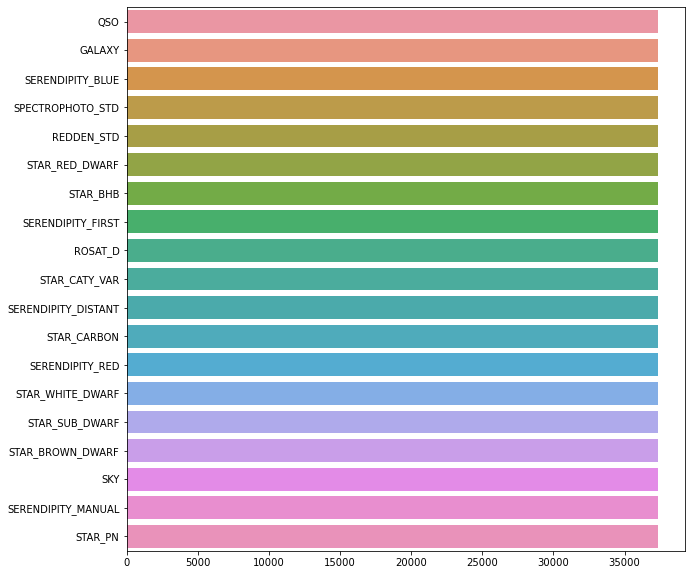

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
sns.barplot(x=pd.DataFrame(y_re).value_counts(), 
            y=train['type'].value_counts().index)

In [24]:
train_smote = pd.merge(X_re, y_re, left_index=True, right_index=True)
train_smote = pd.DataFrame(train_smote)

train_smote

,id,fiberID,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,...,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,type
0,0,601,23.198224,21.431953,21.314148,21.176553,21.171444,22.581309,21.644453,21.657571,...,21.431636,21.478312,21.145409,20.422446,22.749241,21.465534,21.364187,21.020605,21.147340,QSO
1,2,427,17.851451,16.727898,16.679677,16.694640,16.641788,18.171890,17.033098,16.999682,...,16.738784,16.688874,16.744210,16.808006,17.818063,16.697434,16.641249,16.660177,16.688928,QSO
2,4,612,26.454969,23.058767,21.471406,19.504961,18.389096,25.700632,23.629122,21.742750,...,22.426929,21.673551,19.610012,18.376141,24.877052,23.147993,21.475342,19.487330,18.375655,STAR_RED_DWARF
3,5,76,19.781358,19.315942,19.431752,19.600843,19.674611,20.167919,19.661686,19.785276,...,19.390363,19.552879,19.688197,19.799425,19.899462,19.325313,19.469356,19.598653,19.677858,SERENDIPITY_BLUE
4,7,14,17.024278,15.786268,15.524910,15.500176,15.527453,17.336320,16.063400,15.889851,...,15.804802,15.625482,15.569017,15.593497,17.037058,15.747645,15.556542,15.500731,15.498295,STAR_BHB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709588,61093,529,18.022458,17.839727,18.242638,18.592078,18.606013,18.343539,18.187785,18.502582,...,17.913515,18.231349,18.449507,18.569643,18.030316,17.859361,18.161407,18.405588,18.532733,STAR_WHITE_DWARF
709589,8189,578,19.349516,19.189731,19.492835,19.773769,19.869983,19.717116,19.482236,19.832030,...,19.200963,19.523737,19.833823,20.020900,19.381003,19.156677,19.491595,19.722549,19.997968,STAR_WHITE_DWARF
709590,121713,522,18.245674,18.152919,18.396100,18.636438,18.916081,18.605603,18.460640,18.759776,...,18.148164,18.445410,18.694345,18.876889,18.247533,18.116148,18.398423,18.624079,18.886151,STAR_WHITE_DWARF
709591,120494,102,19.968711,19.470622,19.697914,19.719254,19.794557,20.313873,19.818538,20.002374,...,19.517847,19.736375,19.820171,19.828062,19.981775,19.481230,19.631138,19.747896,19.807736,STAR_WHITE_DWARF


In [25]:
train_re = pd.concat([train_smote, train_qso640], axis=0)
train_re

,id,fiberID,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,...,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,type
0,0,601,23.198224,21.431953,21.314148,21.176553,21.171444,22.581309,21.644453,21.657571,...,21.431636,21.478312,21.145409,20.422446,22.749241,21.465534,21.364187,21.020605,21.147340,QSO
1,2,427,17.851451,16.727898,16.679677,16.694640,16.641788,18.171890,17.033098,16.999682,...,16.738784,16.688874,16.744210,16.808006,17.818063,16.697434,16.641249,16.660177,16.688928,QSO
2,4,612,26.454969,23.058767,21.471406,19.504961,18.389096,25.700632,23.629122,21.742750,...,22.426929,21.673551,19.610012,18.376141,24.877052,23.147993,21.475342,19.487330,18.375655,STAR_RED_DWARF
3,5,76,19.781358,19.315942,19.431752,19.600843,19.674611,20.167919,19.661686,19.785276,...,19.390363,19.552879,19.688197,19.799425,19.899462,19.325313,19.469356,19.598653,19.677858,SERENDIPITY_BLUE
4,7,14,17.024278,15.786268,15.524910,15.500176,15.527453,17.336320,16.063400,15.889851,...,15.804802,15.625482,15.569017,15.593497,17.037058,15.747645,15.556542,15.500731,15.498295,STAR_BHB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199914,199914,754,22.714277,21.131193,20.800506,20.312766,20.042128,22.792007,21.539447,21.148981,...,21.218575,20.544633,20.318034,19.888986,23.874874,20.915737,20.692687,20.295984,19.952191,QSO
199937,199937,668,21.675167,20.965677,20.392277,20.195776,19.920853,21.644987,21.283902,20.655655,...,22.399601,19.595583,20.854468,20.829724,21.852890,21.012461,20.427222,20.277706,19.953553,QSO
199959,199959,658,20.404905,19.961836,19.700926,19.585699,19.509480,20.733356,20.249451,20.051816,...,19.831474,19.616411,19.512410,19.437839,20.427797,19.901381,19.669097,19.567053,19.507601,QSO
199980,199980,667,25.732737,20.791882,19.543156,19.098454,18.774731,24.579301,21.104934,19.893325,...,20.995036,19.631403,19.056447,18.813060,25.523111,20.825949,19.573277,19.070012,18.753282,QSO


In [26]:
X_cols = ['fiberID', 'psfMag_u', 'psfMag_g', 'psfMag_r', 'psfMag_i',
       'psfMag_z', 'fiberMag_u', 'fiberMag_g', 'fiberMag_r', 'fiberMag_i',
       'fiberMag_z', 'petroMag_u', 'petroMag_g', 'petroMag_r', 'petroMag_i',
       'petroMag_z', 'modelMag_u', 'modelMag_g', 'modelMag_r', 'modelMag_i',
       'modelMag_z']
X = train_re[X_cols]
y = train_re["type"]

In [27]:
X_train, X_test,y_train, y_test = train_test_split(X, y, random_state=10, test_size=0.3)

In [28]:
dt_clf = DecisionTreeClassifier(max_depth=200)

dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=200)

In [29]:
pred = dt_clf.predict(X_test)

In [30]:
accuracy = accuracy_score(y_test, pred)
cf_mat = confusion_matrix(y_test, pred)

In [31]:
print("accuracy_score: {0:.4f}".format(accuracy))

accuracy_score: 0.8547


In [32]:
s_type = train["type"].unique()
features = X_train.columns

print(s_type, features)

['QSO' 'STAR_RED_DWARF' 'SERENDIPITY_BLUE' 'STAR_BHB' 'STAR_CATY_VAR'
 'SERENDIPITY_DISTANT' 'GALAXY' 'SPECTROPHOTO_STD' 'REDDEN_STD' 'ROSAT_D'
 'STAR_WHITE_DWARF' 'SERENDIPITY_RED' 'STAR_CARBON' 'SERENDIPITY_FIRST'
 'STAR_BROWN_DWARF' 'STAR_SUB_DWARF' 'SKY' 'SERENDIPITY_MANUAL' 'STAR_PN'] Index(['fiberID', 'psfMag_u', 'psfMag_g', 'psfMag_r', 'psfMag_i', 'psfMag_z',
       'fiberMag_u', 'fiberMag_g', 'fiberMag_r', 'fiberMag_i', 'fiberMag_z',
       'petroMag_u', 'petroMag_g', 'petroMag_r', 'petroMag_i', 'petroMag_z',
       'modelMag_u', 'modelMag_g', 'modelMag_r', 'modelMag_i', 'modelMag_z'],
      dtype='object')


In [33]:
from sklearn.tree import export_graphviz
export_graphviz(dt_clf, out_file="tree.dot", class_names=s_type, feature_names=features, 
                impurity=True, filled=True)

import graphviz

with open("tree.dot") as f:
	dot_graph = f.read()
    
graphviz.Source(dot_graph)

In [34]:
from sklearn.metrics import log_loss

y_pred_proba = dt_clf.predict_proba(X_test)
print("log loss: {0:.4f}".format(log_loss(y_test, y_pred_proba)))

log loss: 5.0197


In [24]:
test = pd.read_csv("test.csv")
test

,id,fiberID,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,...,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
0,199991,251,23.817399,22.508963,20.981106,18.517316,17.076079,25.053890,23.167848,21.335901,...,22.246697,22.796239,21.195315,18.584486,17.154284,25.391534,22.499435,21.011918,18.499341,17.091474
1,199992,386,22.806983,21.937111,20.335770,20.000512,19.527369,22.498565,22.186000,20.618879,...,21.729831,21.837511,20.196128,19.967204,19.683671,22.475338,21.853442,20.173169,19.796757,19.567372
2,199993,232,21.024250,19.235669,18.304061,17.808608,17.380113,21.205546,19.439533,18.344433,...,20.722629,18.710223,17.611851,17.158519,16.843986,20.579314,18.653338,17.562108,17.120529,16.708748
3,199994,557,20.503424,20.286261,20.197204,20.162419,20.059832,20.976132,20.611498,20.567262,...,20.329269,20.385262,20.129157,20.206574,20.212342,20.479879,20.280943,20.150499,20.206221,20.092909
4,199995,75,24.244851,22.668237,21.239333,19.284777,18.235939,25.681860,22.935289,21.642456,...,22.308298,22.957496,21.285033,19.299120,18.307526,25.489360,22.857290,21.191862,19.237964,18.280368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10004,209995,389,19.765035,19.542406,19.439286,19.357957,19.357305,20.093308,19.827172,19.714033,...,19.882728,19.549257,19.457564,19.303361,19.483389,19.792181,19.536518,19.432463,19.376445,19.354976
10005,209996,247,19.960030,19.609379,19.325949,19.391290,19.258862,20.319914,19.928523,19.696262,...,20.085454,19.635609,19.381924,19.460517,19.390865,20.066552,19.604800,19.334113,19.401240,19.159412
10006,209997,941,21.221899,20.276182,20.090775,19.927208,19.766732,21.254454,20.551190,20.365800,...,20.998020,20.315201,20.236725,20.058801,19.988363,21.045501,20.255485,20.141549,19.906014,19.953932
10007,209998,674,21.625469,21.624585,21.093379,21.191775,21.186596,22.042942,21.950139,21.610805,...,22.320173,21.516809,21.270925,21.196019,21.331529,21.700769,21.589489,21.128330,21.430526,21.220902


In [21]:
sample_submission = pd.read_csv("sample_submission.csv")

In [26]:
y_pred = dt_clf.predict_proba(test[X_cols])

In [9]:
X2 = train[X_cols]
y2 = train["type"]
dt_clf2 = DecisionTreeClassifier()

X_train, X_test, y_train, y_test = train_test_split(X2, y2, random_state=10, test_size=0.3)

dt_clf2.fit(X_train, y_train)

DecisionTreeClassifier()

In [13]:
pred = dt_clf2.predict(X_test)

In [14]:
accuracy = accuracy_score(y_test, pred)
print("accuracy_score: {0:.4f}".format(accuracy))

accuracy_score: 0.8143


In [16]:
from sklearn.metrics import log_loss

y_pred_proba = dt_clf2.predict_proba(X_test)
print("log loss: {0:.4f}".format(log_loss(y_test, y_pred_proba)))

log loss: 6.4129
